In [1]:
import osmnx as ox
import matplotlib.pyplot as plt 
import osmnx as ox
import pandas as pd
from geopy import distance
import requests # to call the openmap/google apis
import json
import datetime
import math
import itertools
import numpy as np

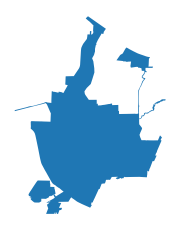

In [2]:
rochester_city = ox.geocode_to_gdf('Rochester, NY, USA')
ax = ox.project_gdf(rochester_city).plot()
_ = ax.axis('off')

/Users/rochelleallan/anaconda3/envs/ox/lib/python3.9/site-packages/osmnx/utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/rochelleallan/anaconda3/envs/ox/lib/python3.9/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/Users/rochelleallan/anaconda3/envs/ox/lib/python3.9/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


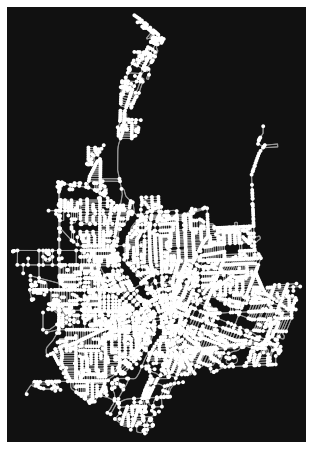

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [3]:
rochester_graph = ox.graph_from_place('Rochester, NY, USA', network_type='drive')
ox.plot_graph(rochester_graph)

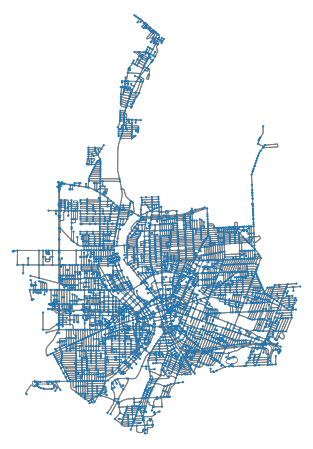

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [4]:
import matplotlib.pyplot as plt 
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
ox.plot.plot_graph(rochester_graph, bgcolor='#FFFFFF', node_color=colors[0], edge_color='grey', node_size=5)

In [48]:
# Sample bounding box in Rochester, NY - Plymouth exchange - Mayors Heights
north, south, east, west = 43.169786,43.171602,-77.565536,-77.559657

/Users/rochelleallan/anaconda3/envs/ox/lib/python3.9/site-packages/osmnx/utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/rochelleallan/anaconda3/envs/ox/lib/python3.9/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/Users/rochelleallan/anaconda3/envs/ox/lib/python3.9/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


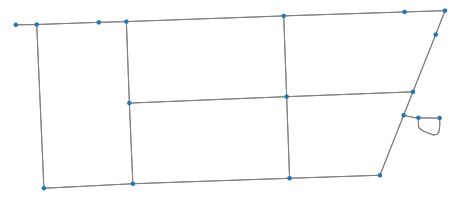

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [49]:
# create a network from the above bounded box
G = ox.graph_from_bbox(north, south, east, west, network_type="drive_service")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
ox.plot.plot_graph(G, bgcolor='#FFFFFF', node_color=colors[0], edge_color='gray', node_size=20)

In [50]:
#Number of nodes within the selected area
count=0
for i in G.nodes:
    count=count+1
print(count)

18


In [51]:
for i in G.nodes:
    print(i)

212631900
212632079
212663366
212663368
212663370
212663374
212693955
212693957
212715950
212715957
212784460
212888548
212888550
212888552
6987262748
8434340082
8434340087
8434340095


In [52]:
#Add locations to dataframe
Locations = []
for i in G.nodes:
    Locations.append(i)

In [53]:
Locations

[212631900,
 212632079,
 212663366,
 212663368,
 212663370,
 212663374,
 212693955,
 212693957,
 212715950,
 212715957,
 212784460,
 212888548,
 212888550,
 212888552,
 6987262748,
 8434340082,
 8434340087,
 8434340095]

In [54]:
roc_data = pd.DataFrame(Locations)
roc_data.rename(columns = {0:'Locations'}, inplace = True)
roc_data

,Locations
0,212631900
1,212632079
2,212663366
3,212663368
4,212663370
5,212663374
6,212693955
7,212693957
8,212715950
9,212715957


In [55]:
#Appending lats and longitudes
latitude = []
longitude = []
for i in Locations:
    latitude.append(G.nodes[i].get('y'))
    longitude.append(G.nodes[i].get('x'))

In [56]:
roc_data['Latitude'] = latitude
roc_data['Longitude'] = longitude

In [57]:
#Display the locations along with latitudes and longitudes in the dataframe
roc_data

,Locations,Latitude,Longitude
0,212631900,43.171305,-77.560003
1,212632079,43.171419,-77.564305
2,212663366,43.169995,-77.560715
3,212663368,43.169967,-77.561869
4,212663370,43.169916,-77.563870
5,212663374,43.169874,-77.565006
6,212693955,43.170667,-77.563915
7,212693957,43.171426,-77.563953
8,212715950,43.170772,-77.560294
9,212715957,43.171528,-77.559884


In [58]:
#Converting the dataframe to a csv
roc_data.to_csv("BoxAreaRochester.csv")

In [59]:
roc_df = pd.read_csv("BoxAreaRochester.csv")

In [60]:
roc_df

,Unnamed: 0,Locations,Latitude,Longitude
0,0,212631900,43.171305,-77.560003
1,1,212632079,43.171419,-77.564305
2,2,212663366,43.169995,-77.560715
3,3,212663368,43.169967,-77.561869
4,4,212663370,43.169916,-77.563870
5,5,212663374,43.169874,-77.565006
6,6,212693955,43.170667,-77.563915
7,7,212693957,43.171426,-77.563953
8,8,212715950,43.170772,-77.560294
9,9,212715957,43.171528,-77.559884


In [61]:
roc_df = roc_df.drop(['Locations'],axis=1)
roc_df.rename(columns = {'Latitude':'Left'}, inplace = True)
roc_df.rename(columns = {'Longitude':'Right'}, inplace = True)

In [62]:
roc_df

,Unnamed: 0,Left,Right
0,0,43.171305,-77.560003
1,1,43.171419,-77.564305
2,2,43.169995,-77.560715
3,3,43.169967,-77.561869
4,4,43.169916,-77.563870
5,5,43.169874,-77.565006
6,6,43.170667,-77.563915
7,7,43.171426,-77.563953
8,8,43.170772,-77.560294
9,9,43.171528,-77.559884


In [63]:
import requests # to call the openmap/google apis -- OSRM for distances
r = requests.get(f"""http://router.project-osrm.org/route/v1/car/{roc_df.loc[0, "Right"]},{roc_df.loc[0, "Left"]};{roc_df.loc[6, "Right"]},{roc_df.loc[6, "Left"]}?overview=false""")

In [64]:
r.content

b'{"code":"Ok","waypoints":[{"hint":"hH3oiYd96IlNAAAAAAAAAAAAAAAAAAAACJ6qQgAAAAAAAAAAAAAAAE0AAAAAAAAAAAAAAAAAAADiRQAAPYdg--m9kgI9h2D76b2SAgAAPxVDtkhB","distance":0,"location":[-77.560003,43.171305],"name":"Merchants Road"},{"hint":"0X3oifR96IkAAAAA6wAAAAAAAAAAAAAAAAAAAJ99I0MAAAAAAAAAAAAAAADrAAAAAAAAAAAAAADiRQAA9Xdg-2u7kgL1d2D7a7uSAgAAfwVDtkhB","distance":0,"location":[-77.563915,43.170667],"name":"Richland Street"}],"routes":[{"legs":[{"steps":[],"weight":55.7,"distance":357.8,"summary":"","duration":55.7}],"weight_name":"routability","weight":55.7,"distance":357.8,"duration":55.7}]}'

In [65]:
json.loads(r.content)["routes"][0]["distance"]

357.8

In [66]:
import json
df3 = pd.DataFrame()
for j in roc_df.index:
    list1 = []
    for i in roc_df.index:
        r = requests.get(f"""http://router.project-osrm.org/route/v1/car/{roc_df.loc[j, "Right"]},{roc_df.loc[j, "Left"]};{roc_df.loc[i, "Right"]},{roc_df.loc[i, "Left"]}?overview=false""")
        list1.append(json.loads(r.content)["routes"][0]["distance"])
    df3[j] = list1

In [67]:
json.loads(r.content)

{'code': 'Ok',
 'waypoints': [{'hint': 'Y37oiWZ-6IkSAAAAAAAAAAAAAAAAAAAAp7DqQAAAAAAAAAAAAAAAABIAAAAAAAAAAAAAAAAAAADiRQAAb4dg--C6kgJvh2D74LqSAgAAbxZDtkhB',
   'distance': 0,
   'location': [-77.559953, 43.170528],
   'name': ''},
  {'hint': 'Y37oiWZ-6IkSAAAAAAAAAAAAAAAAAAAAp7DqQAAAAAAAAAAAAAAAABIAAAAAAAAAAAAAAAAAAADiRQAAb4dg--C6kgJvh2D74LqSAgAAbxZDtkhB',
   'distance': 0,
   'location': [-77.559953, 43.170528],
   'name': ''}],
 'routes': [{'legs': [{'steps': [],
     'weight': 0,
     'distance': 0,
     'summary': '',
     'duration': 0}],
   'weight_name': 'routability',
   'weight': 0,
   'distance': 0,
   'duration': 0}]}

In [68]:
df3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,385.4,156.7,250.4,412.8,505.1,357.8,356.9,63.8,26.6,194.7,471.5,449.8,193.8,68.6,89.9,105.4,114.9
1,385.4,0.0,542.2,359.9,196.7,234.1,113.0,28.6,449.3,358.8,275.3,86.0,64.4,191.6,316.9,475.3,490.9,500.4
2,156.7,542.2,0.0,93.7,256.1,348.4,386.9,513.6,92.9,183.4,178.2,628.2,606.5,350.5,225.3,66.9,82.4,104.4
3,250.4,359.9,93.7,0.0,162.4,254.7,247.7,331.4,186.6,277.0,84.6,445.9,424.3,168.3,319.0,160.5,176.1,198.1
4,412.8,196.7,256.1,162.4,0.0,92.3,83.6,168.1,349.0,439.4,247.0,282.7,261.0,331.2,481.4,322.9,338.5,360.5
5,505.1,234.1,348.4,254.7,92.3,0.0,175.9,262.7,441.3,531.7,339.3,191.4,169.8,425.8,551.0,415.2,430.8,452.7
6,357.8,113.0,339.7,246.0,83.6,175.9,0.0,84.5,294.0,384.4,163.1,199.1,177.4,247.6,372.8,320.0,335.6,357.6
7,356.9,28.6,513.6,331.4,168.1,262.7,84.5,0.0,420.7,330.3,246.8,114.6,92.9,163.1,288.3,446.8,462.3,471.8
8,63.8,449.3,92.9,186.6,349.0,441.3,294.0,420.7,0.0,90.4,130.9,535.3,513.6,257.6,132.4,26.1,41.6,63.6
9,26.6,358.8,183.4,277.0,439.4,593.0,414.7,330.3,90.4,0.0,250.9,444.9,423.2,167.2,42.0,116.5,132.0,141.6


In [69]:
df = roc_df

In [70]:
df['coordinate'] = list(zip(df['Right'],df['Left']))
df['ID'] = df.index

In [71]:
df

,Unnamed: 0,Left,Right,coordinate,ID
0,0,43.171305,-77.560003,"(-77.560003, 43.171305)",0
1,1,43.171419,-77.564305,"(-77.564305, 43.171419)",1
2,2,43.169995,-77.560715,"(-77.560715, 43.169995)",2
3,3,43.169967,-77.561869,"(-77.561869, 43.169967)",3
4,4,43.169916,-77.563870,"(-77.56387, 43.169916)",4
5,5,43.169874,-77.565006,"(-77.565006, 43.169874)",5
6,6,43.170667,-77.563915,"(-77.563915, 43.170667)",6
7,7,43.171426,-77.563953,"(-77.563953, 43.171426)",7
8,8,43.170772,-77.560294,"(-77.560294, 43.170772)",8
9,9,43.171528,-77.559884,"(-77.559884, 43.171528)",9


In [72]:
locations = dict( ( ID, (df.loc[ID, 'Right'], df.loc[ID, 'Left']) ) for ID in df.index)
locations

{0: (-77.560003, 43.171305),
 1: (-77.564305, 43.171419),
 2: (-77.560715, 43.169995),
 3: (-77.561869, 43.169967),
 4: (-77.56387, 43.169916),
 5: (-77.565006, 43.169874),
 6: (-77.563915, 43.170667),
 7: (-77.563953, 43.171426),
 8: (-77.560294, 43.170772),
 9: (-77.559884, 43.171528),
 10: (-77.561906, 43.170727),
 11: (-77.565365, 43.171396),
 12: (-77.565098, 43.171399),
 13: (-77.561944, 43.171479),
 14: (-77.5604008, 43.1715159),
 15: (-77.5604122, 43.1705539),
 16: (-77.5602238, 43.1705304),
 17: (-77.5599531, 43.1705281)}

In [73]:
distances_df = df3
distances_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,385.4,156.7,250.4,412.8,505.1,357.8,356.9,63.8,26.6,194.7,471.5,449.8,193.8,68.6,89.9,105.4,114.9
1,385.4,0.0,542.2,359.9,196.7,234.1,113.0,28.6,449.3,358.8,275.3,86.0,64.4,191.6,316.9,475.3,490.9,500.4
2,156.7,542.2,0.0,93.7,256.1,348.4,386.9,513.6,92.9,183.4,178.2,628.2,606.5,350.5,225.3,66.9,82.4,104.4
3,250.4,359.9,93.7,0.0,162.4,254.7,247.7,331.4,186.6,277.0,84.6,445.9,424.3,168.3,319.0,160.5,176.1,198.1
4,412.8,196.7,256.1,162.4,0.0,92.3,83.6,168.1,349.0,439.4,247.0,282.7,261.0,331.2,481.4,322.9,338.5,360.5
5,505.1,234.1,348.4,254.7,92.3,0.0,175.9,262.7,441.3,531.7,339.3,191.4,169.8,425.8,551.0,415.2,430.8,452.7
6,357.8,113.0,339.7,246.0,83.6,175.9,0.0,84.5,294.0,384.4,163.1,199.1,177.4,247.6,372.8,320.0,335.6,357.6
7,356.9,28.6,513.6,331.4,168.1,262.7,84.5,0.0,420.7,330.3,246.8,114.6,92.9,163.1,288.3,446.8,462.3,471.8
8,63.8,449.3,92.9,186.6,349.0,441.3,294.0,420.7,0.0,90.4,130.9,535.3,513.6,257.6,132.4,26.1,41.6,63.6
9,26.6,358.8,183.4,277.0,439.4,593.0,414.7,330.3,90.4,0.0,250.9,444.9,423.2,167.2,42.0,116.5,132.0,141.6


/Users/rochelleallan/anaconda3/envs/ox/lib/python3.9/site-packages/osmnx/utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/rochelleallan/anaconda3/envs/ox/lib/python3.9/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/Users/rochelleallan/anaconda3/envs/ox/lib/python3.9/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


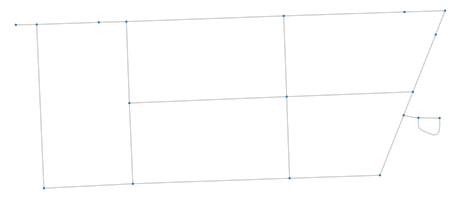

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [74]:
G = ox.graph_from_bbox(north, south, east, west, network_type="drive_service")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
ox.plot.plot_graph(G, bgcolor='#FFFFFF', node_color=colors[0], edge_color='lightgray', node_size=5)

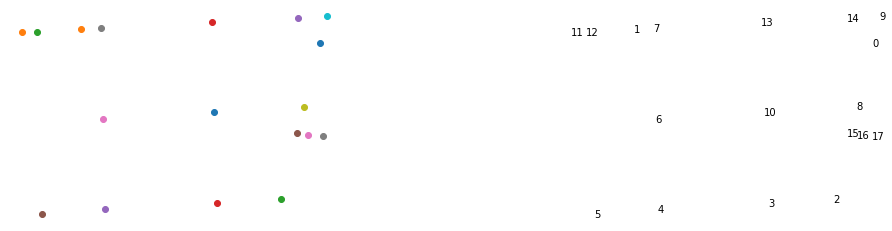

In [75]:
import matplotlib.pyplot as plt
for l in locations:
    lo = locations[l]
    plt.plot(lo[0],lo[1],'o')
    plt.text(lo[0]+.01,lo[1],l,horizontalalignment='center',verticalalignment='center')
    
plt.gca().axis('off');

In [76]:
distance = distances_df

In [77]:
type(df.ID[0])

numpy.int64

In [78]:
distances = dict( ((l1,l2), distance.iloc[l1, l2] ) for l1 in locations for l2 in locations if l1!=l2)
distances

{(0, 1): 385.4,
 (0, 2): 156.7,
 (0, 3): 250.4,
 (0, 4): 412.8,
 (0, 5): 505.1,
 (0, 6): 357.8,
 (0, 7): 356.9,
 (0, 8): 63.8,
 (0, 9): 26.6,
 (0, 10): 194.7,
 (0, 11): 471.5,
 (0, 12): 449.8,
 (0, 13): 193.8,
 (0, 14): 68.6,
 (0, 15): 89.9,
 (0, 16): 105.4,
 (0, 17): 114.9,
 (1, 0): 385.4,
 (1, 2): 542.2,
 (1, 3): 359.9,
 (1, 4): 196.7,
 (1, 5): 234.1,
 (1, 6): 113.0,
 (1, 7): 28.6,
 (1, 8): 449.3,
 (1, 9): 358.8,
 (1, 10): 275.3,
 (1, 11): 86.0,
 (1, 12): 64.4,
 (1, 13): 191.6,
 (1, 14): 316.9,
 (1, 15): 475.3,
 (1, 16): 490.9,
 (1, 17): 500.4,
 (2, 0): 156.7,
 (2, 1): 542.2,
 (2, 3): 93.7,
 (2, 4): 256.1,
 (2, 5): 348.4,
 (2, 6): 386.9,
 (2, 7): 513.6,
 (2, 8): 92.9,
 (2, 9): 183.4,
 (2, 10): 178.2,
 (2, 11): 628.2,
 (2, 12): 606.5,
 (2, 13): 350.5,
 (2, 14): 225.3,
 (2, 15): 66.9,
 (2, 16): 82.4,
 (2, 17): 104.4,
 (3, 0): 250.4,
 (3, 1): 359.9,
 (3, 2): 93.7,
 (3, 4): 162.4,
 (3, 5): 254.7,
 (3, 6): 247.7,
 (3, 7): 331.4,
 (3, 8): 186.6,
 (3, 9): 277.0,
 (3, 10): 84.6,
 (3, 11): 44

In [79]:
V = 1 #the number vehicles/people deployed

In [80]:
import networkx as nx
from pulp import *
import seaborn as sn
prob=LpProblem("vehicle", LpMinimize)

In [81]:
#indicates if location i is connected to location j along route 
indicator = LpVariable.dicts('indicator',distances, 0,1,LpBinary)
#elimiate subtours
eliminator = LpVariable.dicts('eliminator', df.ID, 0, len(df.ID)-1, LpInteger)

In [82]:
cost = lpSum([indicator[(i,j)]*distances[(i,j)] for (i,j) in distances])
prob+=cost

In [83]:
#constraints
for v in df.ID:
    cap = 1 if v != 11 else V
    #inward possible route
    prob+= lpSum([ indicator[(i,v)] for i in df.ID if (i,v) in indicator]) ==cap
    #outward possible route
    prob+=lpSum([ indicator[(v,i)] for i in df.ID if (v,i) in indicator]) ==cap
    
#subtour elimination
num=len(df.ID)/V
for i in df.ID:
    for j in df.ID:
        if i != j and (i != 11 and j!= 11) and (i,j) in indicator:
            prob += eliminator[i] - eliminator[j] <= (num)*(1-indicator[(i,j)]) - 1

In [84]:
%time prob.solve()
print(LpStatus[prob.status])

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/rochelleallan/anaconda3/envs/ox/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/0f/0wx77bhd2sl15rhs858yxhtc0000gn/T/e7aed983d96a425baf0b668e60716d3c-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/0f/0wx77bhd2sl15rhs858yxhtc0000gn/T/e7aed983d96a425baf0b668e60716d3c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 313 COLUMNS
At line 2694 RHS
At line 3003 BOUNDS
At line 3327 ENDATA
Problem MODEL has 308 rows, 323 columns and 1428 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 1050.59 - 0.00 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 272 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 272 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 272 strengthened rows, 0 substitutions
Cg

In [85]:
feasible_edges = [ e for e in indicator if value(indicator[e]) != 0 ]

def get_next_loc(initial):
    '''to get the next edge'''
    edges = [e for e in feasible_edges if e[0]==initial]
    for e in edges:
        feasible_edges.remove(e)
    return edges

. 3341.66 iterations 27
Cbc0038I Pass   6: suminf.    2.44444 (8) obj. 3316.44 iterations 35
Cbc0038I Pass   7: suminf.    4.44444 (12) obj. 4707.29 iterations 116
Cbc0038I Pass   8: suminf.    3.94444 (11) obj. 4930.13 iterations 54
Cbc0038I Pass   9: suminf.    1.22222 (7) obj. 5019.91 iterations 62
Cbc0038I Pass  10: suminf.    3.09841 (16) obj. 5202.65 iterations 55
Cbc0038I Pass  11: suminf.    3.16138 (24) obj. 5271.06 iterations 7
Cbc0038I Pass  12: suminf.    2.29412 (6) obj. 5597.6 iterations 89
Cbc0038I Pass  13: suminf.    4.35185 (17) obj. 5668.35 iterations 29
Cbc0038I Pass  14: suminf.    4.29380 (21) obj. 5607.25 iterations 40
Cbc0038I Pass  15: suminf.    2.65183 (15) obj. 5627.96 iterations 78
Cbc0038I Pass  16: suminf.    3.05556 (21) obj. 5655.47 iterations 34
Cbc0038I Pass  17: suminf.    2.22222 (6) obj. 5499.3 iterations 83
Cbc0038I Pass  18: suminf.    3.22222 (11) obj. 5499.3 iterations 49
Cbc0038I Pass  19: suminf.    2.33333 (6) obj. 5499.3 iterations 70
Cbc00

In [86]:
routes = get_next_loc(11)
routes = [ [e] for e in routes ]

for r in routes:
    while r[-1][1] !=11:
        r.append(get_next_loc(r[-1][1])[-1])

ll problem 308 rows 323 columns, reduced to 259 rows 21 columns - 4 fixed gives 252, 18 - still too large
Cbc0038I Full problem 308 rows 323 columns, reduced to 27 rows 18 columns
Cbc0038I Full problem 308 rows 323 columns, reduced to 37 rows 17 columns
Cbc0038I Full problem 308 rows 323 columns, reduced to 47 rows 17 columns
Cbc0038I Full problem 308 rows 323 columns, reduced to 261 rows 23 columns - 4 fixed gives 242, 18 - still too large
Cbc0004I Integer solution of 1580.6 found after 29429 iterations and 709 nodes (9.37 seconds)
Cbc0004I Integer solution of 1464.3 found after 33489 iterations and 795 nodes (9.98 seconds)
Cbc0016I Integer solution of 1464.2 found by strong branching after 36357 iterations and 832 nodes (10.30 seconds)
Cbc0038I Full problem 308 rows 323 columns, reduced to 174 rows 33 columns
Cbc0010I After 1000 nodes, 196 on tree, 1464.2 best solution, best possible 1254.0997 (11.65 seconds)
Cbc0038I Full problem 308 rows 323 columns, reduced to 152 rows 26 columns


In [87]:
routes

[[(11, 12),
  (12, 5),
  (5, 4),
  (4, 3),
  (3, 2),
  (2, 15),
  (15, 17),
  (17, 16),
  (16, 8),
  (8, 0),
  (0, 9),
  (9, 14),
  (14, 13),
  (13, 10),
  (10, 6),
  (6, 7),
  (7, 1),
  (1, 11)]]

In [88]:
routes1 = routes

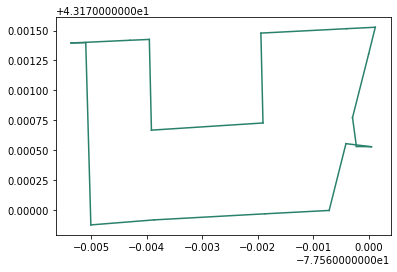

In [89]:
import numpy as np
#outline the routes
coloured_loc = [np.random.rand(3) for i in range(len(routes))]
for r,co in zip(routes,coloured_loc):
    for a,b in r:
        l1,l2 = locations[a], locations[b]
        plt.plot([l1[0],l2[0]],[l1[1],l2[1]], color=co)

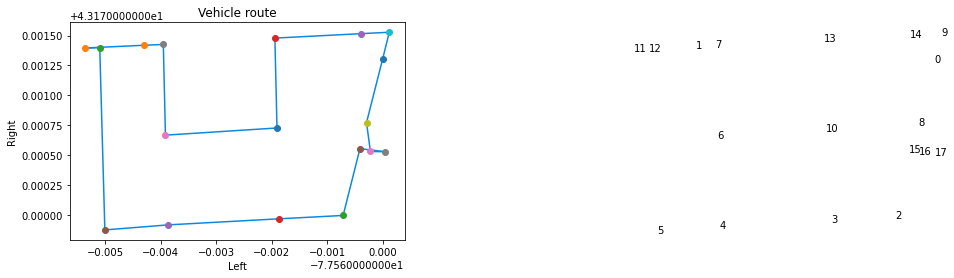

In [90]:
#outline the routes
coloured_loc = [np.random.rand(3) for i in range(len(routes))]
for r,co in zip(routes,coloured_loc):
    for a,b in r:
        l1,l2 = locations[a], locations[b]
        plt.plot([l1[0],l2[0]],[l1[1],l2[1]], color=co)
for l in locations:
    lo = locations[l]
    plt.plot(lo[0],lo[1],'o')
    plt.text(lo[0]+.01,lo[1],l,horizontalalignment='center',verticalalignment='center')
    
    
plt.title('%d '%V + 'Vehicle routes' if V > 1 else 'Vehicle route')
plt.xlabel('Left')
plt.ylabel('Right')
plt.show()

In [57]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

In [ ]:
def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data['distance_matrix'] = distance
       
    data['num_vehicles'] = 1
    data['depot'] = 6
    return data

In [ ]:
def print_solution(data, manager, routing, solution):
    """Prints solution on console."""
    max_route_distance = 0
    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        plan_output = 'Route for vehicle {}:\n'.format(vehicle_id)
        route_distance = 0
        while not routing.IsEnd(index):
            plan_output += ' {} -> '.format(manager.IndexToNode(index))
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id)
        plan_output += '{}\n'.format(manager.IndexToNode(index))
       #plan_output += 'Distance of the route: {}m\n'.format(route_distance)
        print(plan_output)
        max_route_distance = max(route_distance, max_route_distance)
    #print('Maximum of the route distances: {}m'.format(max_route_distance))

In [ ]:
def main():
    """Solve the CVRP problem."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)


    # Create and register a transit callback.
    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Add Distance constraint.
    dimension_name = 'Distance'
    routing.AddDimension(
        transit_callback_index,
        0,  # no slack
        3000,  # vehicle maximum travel distance
        True,  # start cumul to zero
        dimension_name)
    distance_dimension = routing.GetDimensionOrDie(dimension_name)
    distance_dimension.SetGlobalSpanCostCoefficient(100)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(data, manager, routing, solution)
if __name__ == '__main__':
    main()

In [ ]:
routes